# Support Vector Machines (SVM) - Regression

In [240]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [241]:
pd.read_excel('tg.xlsx')
df = pd.read_excel('tg.xlsx')
df.head()

,PC (mmH2O),DV (t/h),VR (tr/min),TV (°C),PE (MW)
0,712.995789,231.413406,3002.122314,452.617828,55.856407
1,713.796997,230.703949,3001.251221,452.889404,54.910316
2,711.194092,230.742188,3001.751465,452.796936,55.240372
3,710.792725,230.413254,3000.750000,452.700378,54.275158
4,715.920410,230.749146,3001.125244,452.089355,53.776802


In [242]:
df.shape

(63, 5)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC (mmH2O)   63 non-null     float64
 1   DV (t/h)     63 non-null     float64
 2   VR (tr/min)  63 non-null     float64
 3   TV (°C)      63 non-null     float64
 4   PE (MW)      63 non-null     float64
dtypes: float64(5)
memory usage: 2.6 KB


In [244]:
df.dtypes

PC (mmH2O)     float64
DV (t/h)       float64
VR (tr/min)    float64
TV (°C)        float64
PE (MW)        float64
dtype: object

In [245]:
df.columns

Index(['PC (mmH2O)', 'DV (t/h)', 'VR (tr/min)', 'TV (°C)', 'PE (MW)'], dtype='object')

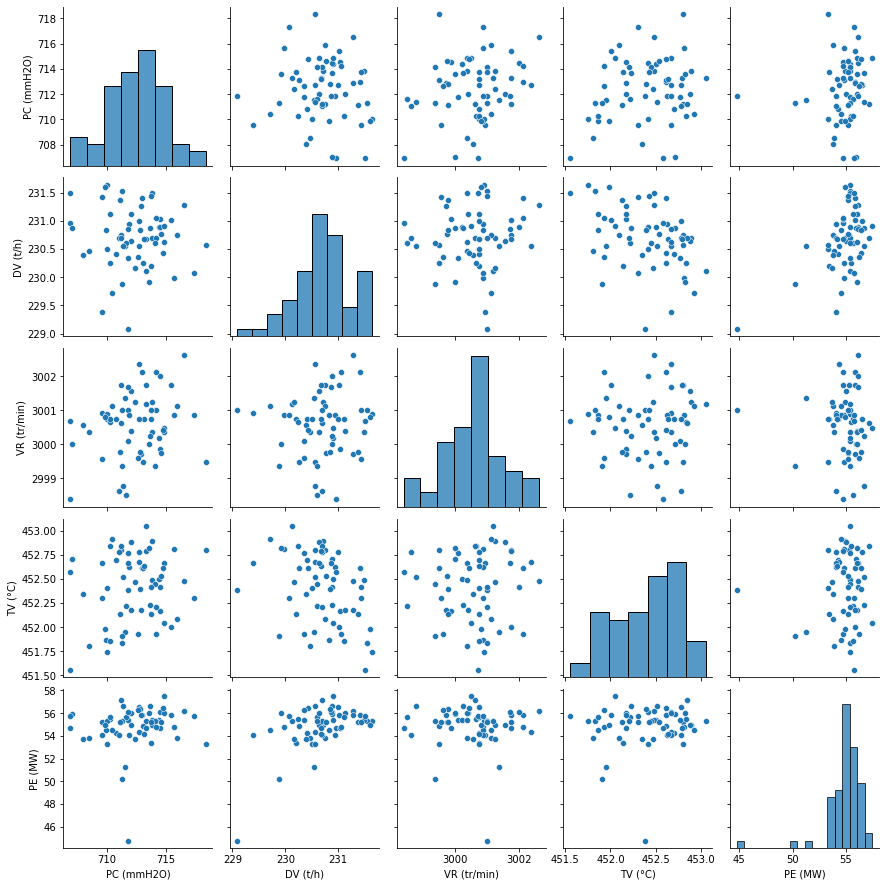

In [246]:
sns.pairplot(df)

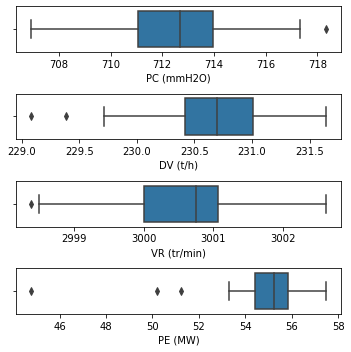

In [311]:
#  Vérification des valeurs aberrantes

#sns.boxplot(x = 'PC (mmH2O)', data = df)


fig, axs = plt.subplots(4, figsize = (5,5))

plt3 = sns.boxplot(df['PC (mmH2O)'], ax = axs[0])
plt3 = sns.boxplot(df['DV (t/h)'], ax = axs[1])
plt3 = sns.boxplot(df['VR (tr/min)'], ax = axs[2])
plt3 = sns.boxplot(df['PE (MW)'], ax = axs[3])

plt.tight_layout()

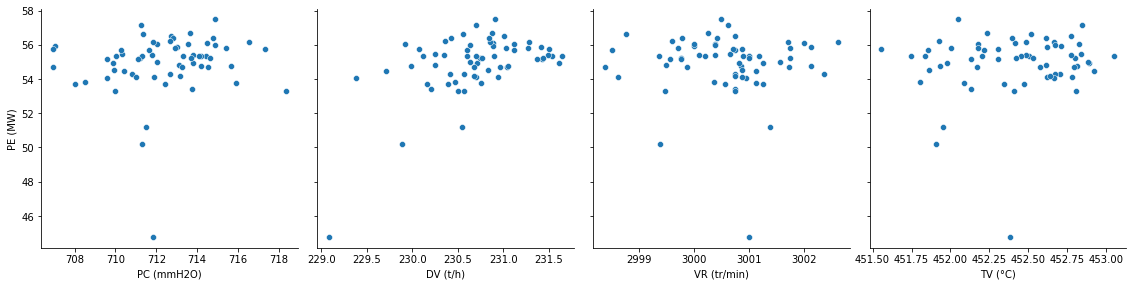

In [361]:
sns.pairplot(df, x_vars=['PC (mmH2O)', 'DV (t/h)', 'VR (tr/min)', 'TV (°C)'], 
             y_vars='PE (MW)', height=4, aspect=1, kind='scatter')
plt.show()

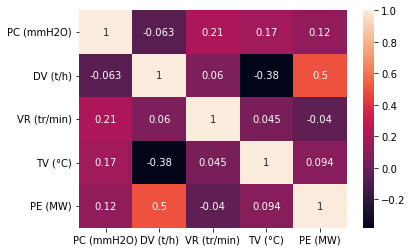

In [307]:
sns.heatmap(df.corr(), annot = True)
plt.show()

# StandardScaler

In [289]:
from sklearn.preprocessing import StandardScaler

In [362]:
scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

In [363]:
df_sc.head()

,PC (mmH2O),DV (t/h),VR (tr/min),TV (°C),PE (MW)
0,0.257772,1.370583,1.675156,0.585190,0.533706
1,0.593841,0.003898,0.722127,1.354103,0.000882
2,-0.497953,0.077560,1.269424,1.092297,0.186764
3,-0.666307,-0.556092,0.173762,0.818914,-0.356830
4,1.484510,0.090963,0.584301,-0.911073,-0.637497


# Defining the variables and splitting the data

In [321]:
X = df.drop(['PE (MW)'], axis=1).values
y = df['PE (MW)'].values

#.reshape(-1,1)

In [322]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# SVM Regression with Sklearn

In [323]:
from sklearn.svm import SVR

In [324]:
# Fitting SVM regression to the Training set

SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)

SVR()

In [325]:
# Predicting the Test set results

y_hat = SVM_regression.predict(X_test)

In [327]:
predictions = pd.DataFrame({'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
0,55.937973,55.282784
1,54.683449,55.282848
2,54.790348,55.282856
3,56.376545,55.282834
4,56.008774,55.282851


# Evaluating the model on test dataset

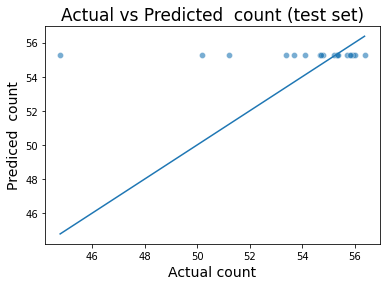

In [332]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

In [334]:
SVM_regression.score(X_test, y_test)

-0.1805880685413419

In [335]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

2.94

# Tuning hyperparameters:

# Gridsearch

Finding the right hyper parameters (like C, gamma and the Kernel function) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

1. C represents cost of misclassification. A large C means that you are penalizing the errors more restricly so the margin will be narrower ie overfitting (small bias, big variance) https://scikit-learn.org/stable/modules/svm.html

2. gamma is the free prameter in the radial basis function (rbf). Intuitively, the gamma parameter (inverse of variance) defines how far the influence of a single training example reaches with low values meaning ‘far’ and high values meaning ‘close’. https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [336]:
my_param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf']} 

In [337]:
from sklearn.model_selection import GridSearchCV

In [453]:
GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [338]:
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [340]:
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

What fit does is a bit more involved than usual. First, it tries multiple combinations from param_grid by cross-validation to find the best parameter combination. 
Once it has the best combination, it retrain the model using optimal hyperparameters on the entire train set.


In [346]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [347]:
grid.best_estimator_

SVR(C=1, gamma=1)

In [348]:
y_hat_optimized = grid.predict(X_test)

In [349]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

,y_test,y_hat,y_hat_optimized
0,55.937973,55.282784,54.938622
1,54.683449,55.282848,55.428446
2,54.790348,55.282856,55.199572
3,56.376545,55.282834,55.771945
4,56.008774,55.282851,55.809221


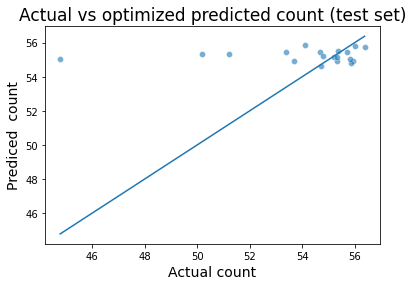

In [350]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs optimized predicted count (test set)', fontsize=17)
plt.show()

In [351]:
grid.score(X_test, y_test)

-0.16627493469529653

In [353]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

2.92

# Cross validation

We will use Cross validation to estimate performance metrics in the test set.


In [355]:
from sklearn.model_selection import cross_val_score

In [358]:
NMSE = cross_val_score(estimator = SVR(C=10, gamma=0.01), 
                       X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )


In [359]:
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV


1.0749